In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#Read the dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

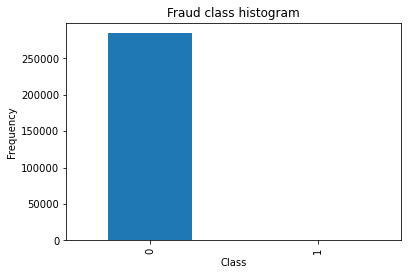

In [3]:
#Check Target Classes
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [7]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)



In [8]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 0])
fraud_indices = np.array(data[data.Class == 0].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 1].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = True)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
over_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
over_sample_data = data.iloc[over_sample_indices,:]

X_over = over_sample_data.loc[:, over_sample_data.columns != 'Class']
y_over = over_sample_data.loc[:, over_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(over_sample_data[over_sample_data.Class == 0])/len(over_sample_data))
print("Percentage of fraud transactions: ", len(over_sample_data[over_sample_data.Class == 1])/len(over_sample_data))
print("Total number of transactions in resampled data: ", len(over_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  568630


In [9]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over
                                                                                                   ,y_over
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_over))
print("Number transactions test dataset: ", len(X_test_over))
print("Total number of transactions: ", len(X_train_over)+len(X_test_over))


Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  398041
Number transactions test dataset:  170589
Total number of transactions:  568630


Text(0.5, 0, 'Class')

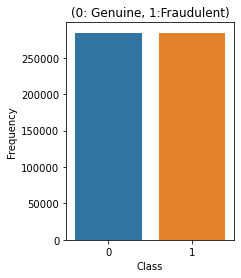

In [10]:
import seaborn as sns
count_classes = pd.value_counts(over_sample_data['Class'], sort = True).sort_index()
'''count_classes.plot(kind = 'bar',color = 'grey')'''

plt.figure(figsize=(3,4))
sns.barplot(x=count_classes.index, y=count_classes)
plt.title('(0: Genuine, 1:Fraudulent)')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [12]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # Different C parameters
    c_param_range_lr = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range_lr),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range_lr

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range_lr:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(solver='lbfgs',C = c_param, penalty = 'l2',max_iter=7600)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample_log = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample_log)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c_lr = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c_lr)
    print('*********************************************************************************')
    
    return best_c_lr

In [13]:
best_c_lr = printing_Kfold_scores(X_train_over,y_train_over)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9178068385113514
Iteration  1 : recall score =  0.9181476719856815
Iteration  2 : recall score =  0.921025641025641
Iteration  3 : recall score =  0.9214354018823293
Iteration  4 : recall score =  0.9188747959311817

Mean recall score  0.919458069867237

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.9200493864489632
Iteration  1 : recall score =  0.9201139428773097
Iteration  2 : recall score =  0.9229768605378361
Iteration  3 : recall score =  0.9234234234234234
Iteration  4 : recall score =  0.9207082757754615

Mean recall score  0.921454377812599

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.9200493864489632
Iteration  1 : recall score =  0.9201139428773097
Ite

In [14]:
# Create a function to plot a fancy confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy score  of logistic regression for Oversampled data is 0.9489181600220413


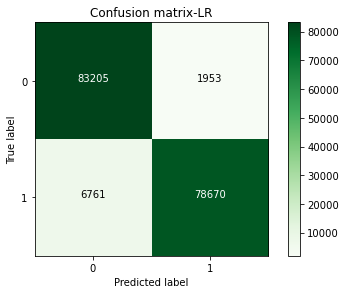

In [15]:
# Predictions on test set and plotting confusion matrix

# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(solver='lbfgs',C = best_c_lr, penalty = 'l2',max_iter=7600)
lr.fit(X_train_over,y_train_over.values.ravel())
y_pred_over_log = lr.predict(X_test_over.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_over,y_pred_over_log)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('The accuracy score  of logistic regression for Oversampled data is {}'.format(accuracy_score(y_test_over,y_pred_over_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [16]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test_over, y_pred_over_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_over, y_pred_over_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_over, y_pred_over_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_over, y_pred_over_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_over, y_pred_over_log)))







The accuracy of Logistic regression is 0.9489181600220413
 
Precision-->0.9757761432841745
 
F_1_Score -->0.9475230948968407
 
recall_Score -->0.9208601093279957
 
matthews_corrcoef -->0.8992748870043928


The accuracy of logistic regression is 0.9775405826106293


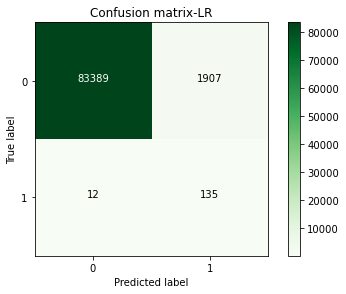

In [17]:
#Whole Data


# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(solver='lbfgs',C = best_c_lr, penalty = 'l2',max_iter=7600)
lr.fit(X_train_over,y_train_over.values.ravel())
y_pred_log = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
log_score=(accuracy_score(y_test, y_pred_log))
print('The accuracy of logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [18]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef


print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_log)))









The accuracy of Logistic regression is 0.9775405826106293
 
Precision-->0.06611165523996082
 
F_1_Score -->0.12334399269072634
 
recall_Score -->0.9183673469387755
 
matthews_corrcoef -->0.2431209112202853


AUC= 0.9869849666357264


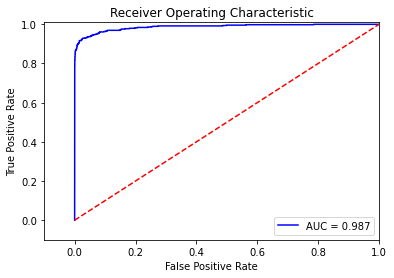

In [19]:
# ROC CURVE

lr = LogisticRegression(solver='lbfgs',C = best_c_lr, penalty = 'l2',max_iter=7600)
y_pred_over_score = lr.fit(X_train_over,y_train_over.values.ravel()).decision_function(X_test_over.values)

fpr, tpr, thresholds = roc_curve(y_test_over.values.ravel(),y_pred_over_score)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# SUPPORT VECTOR MACHINE

def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # Different C parameters
    c_param_range_svm = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range_svm),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range_svm

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range_svm:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)): 

            # Call the logistic regression model with a certain C parameter
            svc = LinearSVC(C = c_param, penalty = 'l2',max_iter=7600,dual=False)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            svc.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_over_svm = svc.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_over_svm)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c_svm = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c_svm)
    print('*********************************************************************************')
    
    return best_c_svm

In [21]:
best_c_svm = printing_Kfold_scores(X_train_over,y_train_over)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9113311663768993
Iteration  1 : recall score =  0.9139378355895031
Iteration  2 : recall score =  0.917098186366479
Iteration  3 : recall score =  0.9171070511852635
Iteration  4 : recall score =  0.9152078362426221

Mean recall score  0.9149364151521535

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.9113311663768993
Iteration  1 : recall score =  0.9139378355895031
Iteration  2 : recall score =  0.917098186366479
Iteration  3 : recall score =  0.9171070511852635
Iteration  4 : recall score =  0.9152078362426221

Mean recall score  0.9149364151521535

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.9113311663768993
Iteration  1 : recall score =  0.9139378355895031
It

The accuracy score of SVM for Over data is = 0.9477398894418749


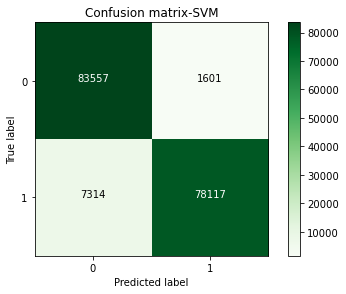

In [22]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
svm.fit(X_train_over,y_train_over.values.ravel())
y_pred_over_svm = svm.predict(X_test_over.values)

# Compute confusion matrix
cn_matrix = confusion_matrix(y_test_over,y_pred_over_svm)
np.set_printoptions(precision=2)

print('The accuracy score of SVM for Over data is = {}'.format(accuracy_score(y_test_over,y_pred_over_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cn_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [23]:

print('In case of oversampled data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test_over, y_pred_over_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_over, y_pred_over_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_over, y_pred_over_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_over, y_pred_over_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_over, y_pred_over_svm)))



In case of oversampled data: 
 
The accuracy of SVM is 0.9477398894418749
 
Precision-->0.9799167063900248
 
F_1_Score -->0.9460184439506142
 
recall_Score -->0.9143870491975981
 
matthews_corrcoef -->0.8975057856918864


The accuracy of SVM is = 0.9816602881453133


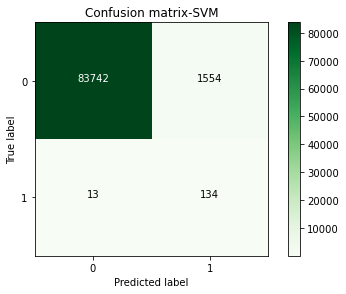

In [24]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
svm.fit(X_train_over,y_train_over.values.ravel())
y_pred_svm = svm.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_svm)
np.set_printoptions(precision=2)

print('The accuracy of SVM is = {}'.format(accuracy_score(y_test, y_pred_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [25]:


print('In case of whole data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test, y_pred_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_svm)))








In case of whole data: 
 
The accuracy of SVM is 0.9816602881453133
 
Precision-->0.07938388625592417
 
F_1_Score -->0.14604904632152588
 
recall_Score -->0.9115646258503401
 
matthews_corrcoef -->0.26604246751347227


AUC= 0.9863733588561763


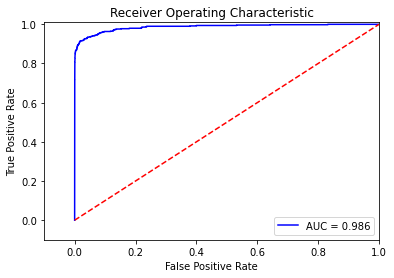

In [26]:
# ROC CURVE
svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
y_pred_over_score = svm.fit(X_train_over,y_train_over.values.ravel()).decision_function(X_test_over.values)

fpr, tpr, thresholds = roc_curve(y_test_over.values.ravel(),y_pred_over_score)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)





# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score  of Naive Bayes for undersample data is 0.9155572750880772


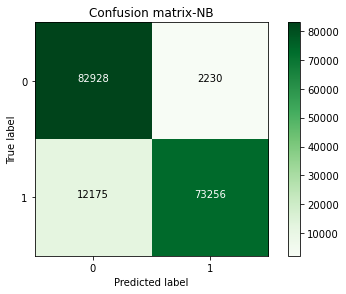

In [27]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_over,y_train_over.values.ravel())
y_pred_over_nb = nb.predict(X_test_over.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_over,y_pred_over_nb)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('The accuracy score  of Naive Bayes for undersample data is {}'.format(accuracy_score(y_test_over,y_pred_over_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()


In [28]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test_over, y_pred_over_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_over, y_pred_over_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_over, y_pred_over_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_over, y_pred_over_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_over, y_pred_over_nb)))







The accuracy of Naive Bayes is 0.9155572750880772
 
Precision-->0.970458098190393
 
F_1_Score -->0.9104818011770043
 
recall_Score -->0.8574873289555314
 
matthews_corrcoef -->0.8368513263249308


The accuracy of Naive Bayes is 0.9744859145863324


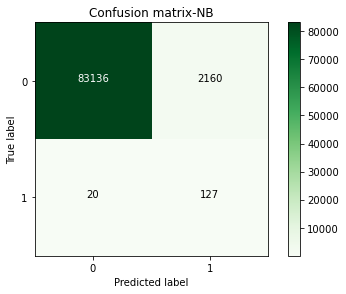

In [29]:
 #Whole Data

nb = GaussianNB()
nb.fit(X_train_over,y_train_over.values.ravel())
y_pred_nb = nb.predict(X_test.values)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_nb)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
log_score=(accuracy_score(y_test, y_pred_nb))
print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test, y_pred_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()

In [30]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test, y_pred_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_nb)))









The accuracy of Naive Bayes is 0.9744859145863324
 
Precision-->0.055531263664188896
 
F_1_Score -->0.10435497124075596
 
recall_Score -->0.8639455782312925
 
matthews_corrcoef -->0.21533239620654043


AUC= 0.9603425518662586


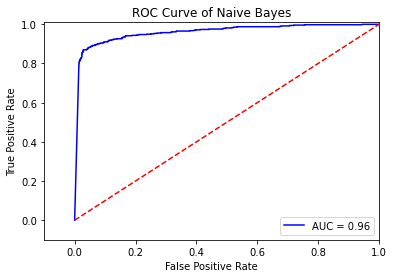

In [31]:
# ROC CURVE
nb = GaussianNB()

nb.fit(X_train_over,y_train_over.values.ravel())
y_scores = nb.predict_proba(X_test_over)
fpr, tpr, threshold = roc_curve(y_test_over, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()




In [32]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 
    
    # Different C parameters
    n_param_range = [3,5,7,9]

    results_table = pd.DataFrame(index = range(len(n_param_range),2), columns = ['n_parameter','Mean recall score'])
    results_table['n_parameter'] = n_param_range
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for n_param in n_param_range:
        print('-------------------------------------------')
        print('n parameter: ', n_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)): 
            # Call the KNN  with a certain C parameter
            knn= KNeighborsClassifier(n_neighbors = n_param, metric = 'minkowski', p = 2)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            knn.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_over = knn.predict(x_train_data.iloc[indices[1],:].values)
            
            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_over)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
            
         # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_n = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['n_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_n)
    print('*********************************************************************************')
    
    return best_n




In [33]:
best_n = printing_Kfold_scores(X_train_over,y_train_over)

-------------------------------------------
n parameter:  3
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  5
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  7
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  9
-------------------------

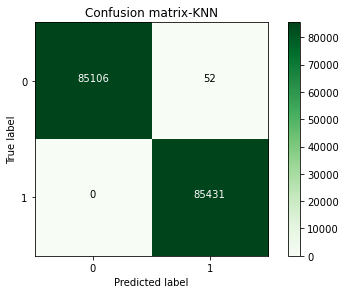

In [34]:
# Use this n_parameter to build the final model 

knn= KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_over,y_train_over.values.ravel())
y_pred_over_knn = knn.predict(X_test_over.values)

# Compute confusion matrix
cn_matrix = confusion_matrix(y_test_over,y_pred_over_knn)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cn_matrix
                      , classes=class_names
                      , title='Confusion matrix-KNN')
plt.show()


In [36]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef

print('Accuracy -->{}'.format(accuracy_score(y_test_over,y_pred_over_knn)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_over,y_pred_over_knn)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test_over, y_pred_over_knn)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_over,y_pred_over_knn)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_over, y_pred_over_knn)))

Accuracy -->0.9996951737802555
 
Precision-->0.9993916919153516
 
Recall-->1.0
 
F_1_Score -->0.9996957534198486
 
matthews_corrcoef -->0.9993905311304441


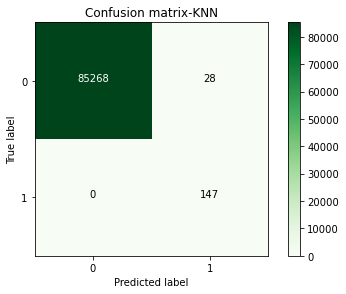

In [37]:
# Use this C_parameter to build the final model

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_over,y_train_over.values.ravel())
y_pred_knn = knn.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_knn)
np.set_printoptions(precision=2)



# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-KNN')
plt.show()




In [38]:


print('Accuracy -->{}'.format(accuracy_score(y_test,y_pred_knn)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_knn)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test,y_pred_knn)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_knn)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test, y_pred_knn)))



Accuracy -->0.9996722961506501
 
Precision-->0.84
 
Recall-->1.0
 
F_1_Score -->0.9130434782608696
 
matthews_corrcoef -->0.9163646950648431


AUC= 0.9997827567580263


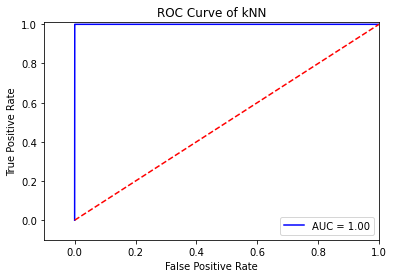

In [40]:
knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_over,y_train_over.values.ravel())
y_scores = knn.predict_proba(X_test_over)
fpr, tpr, threshold = roc_curve(y_test_over, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()